In [1]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np
import pandas as pd
from rdkit.Chem import Descriptors, MolFromSmiles
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mordred
from mordred import Calculator, descriptors
import imblearn
from imblearn.over_sampling import SMOTE
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.0 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=3346249d0990b10f60ba35755877fa820fda02cfb0e7bbd595cc32c1479e1347
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
#df_raw = pd.read_csv("test_data.csv")
train = pd.read_csv("/content/drive/MyDrive/ADMET/train_admet.csv", sep =",")
test = pd.read_csv("/content/drive/MyDrive/ADMET/test_admet.csv", sep =",")
train = train.drop(["Unnamed: 0", "Drug_ID"], axis=1)
test = test.drop(["Unnamed: 0", "Drug_ID"], axis=1)

Расчет физико-химических дескрипторов

In [ ]:
def get_rdkit(df):
    computed_descriptors = Chem.Descriptors.descList
    for descriptor in computed_descriptors:
        name = descriptor[0]
        df[name] = df["Drug"].apply(lambda x: descriptor[1](MolFromSmiles(x)))


In [ ]:
get_rdkit(train)
get_rdkit(test)

Выходные данные были обрезаны до нескольких последних строк (5000).
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use MorganGenerator
[11:14:25] DEPRECATION WARNING: please use Morg

Анализ данных на основе полученных физико-химических параметров

In [ ]:
train

,Drug,Y,property,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1,11.824743,11.824743,0.170602,-0.170602,0.269289,14.608696,301.345,...,0,0,0,0,0,0,0,0,0,0
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1,14.431073,14.431073,0.128988,-0.378575,0.184582,12.480000,646.614,...,0,0,0,0,0,0,0,0,0,0
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1,10.422197,10.422197,0.248657,-0.670278,0.103849,7.727273,157.133,...,0,0,0,0,0,0,0,0,0,0
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1,10.521759,10.521759,0.278148,-0.752407,0.342148,16.600000,138.086,...,0,0,0,0,0,0,0,0,0,1
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1,11.230461,11.230461,0.034298,-0.976244,0.241838,15.789474,264.285,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1,3,11.106041,11.106041,0.037685,-1.000936,0.466075,10.705882,276.035,...,0,0,0,0,0,0,0,0,0,0
7935,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1,3,10.698110,10.698110,0.210831,-1.284365,0.344970,27.703704,398.445,...,0,0,0,0,0,0,0,0,0,0
7936,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1,3,11.877182,11.877182,0.094708,-0.499803,0.685827,11.708333,322.368,...,0,0,0,0,0,0,0,0,0,1
7937,CCc1c(C)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(OC...,1,3,8.783737,8.783737,0.616526,0.616526,0.588327,10.785714,382.460,...,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
train['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train['property'].plot(kind='hist', bins=20, title='property')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train['MaxAbsEStateIndex'].plot(kind='hist', bins=20, title='MaxAbsEStateIndex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train['MaxEStateIndex'].plot(kind='hist', bins=20, title='MaxEStateIndex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='Y', y='property', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='property', y='MaxAbsEStateIndex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='MaxAbsEStateIndex', y='MaxEStateIndex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='MaxEStateIndex', y='MinAbsEStateIndex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['property']
  ys = series['Y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('property', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('property')
_ = plt.ylabel('Y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['property']
  ys = series['MaxAbsEStateIndex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('property', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('property')
_ = plt.ylabel('MaxAbsEStateIndex')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['property']
  ys = series['MaxEStateIndex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('property', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('property')
_ = plt.ylabel('MaxEStateIndex')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['property']
  ys = series['MinAbsEStateIndex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('property', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('property')
_ = plt.ylabel('MinAbsEStateIndex')

from matplotlib import pyplot as plt
train['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train['property'].plot(kind='line', figsize=(8, 4), title='property')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train['MaxAbsEStateIndex'].plot(kind='line', figsize=(8, 4), title='MaxAbsEStateIndex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train['MaxEStateIndex'].plot(kind='line', figsize=(8, 4), title='MaxEStateIndex')
plt.gca().spines[['top', 'right']].set_visible(False)

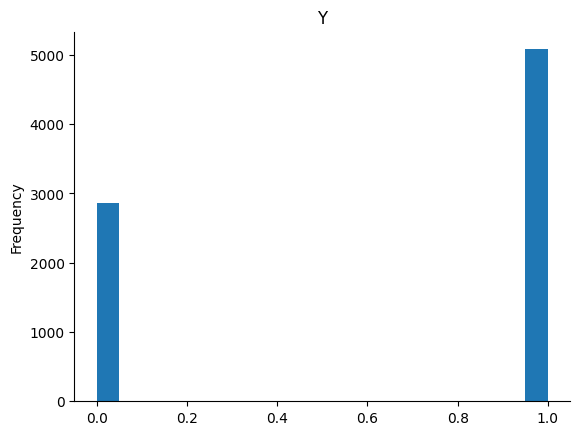

In [ ]:
from matplotlib import pyplot as plt
train['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train=train.dropna(axis=0)
train=train.reset_index()
train=train.drop(['index'], axis=1)
train

,Drug,Y,property,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1,11.824743,11.824743,0.170602,-0.170602,0.269289,14.608696,301.345,...,0,0,0,0,0,0,0,0,0,0
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1,14.431073,14.431073,0.128988,-0.378575,0.184582,12.480000,646.614,...,0,0,0,0,0,0,0,0,0,0
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1,10.422197,10.422197,0.248657,-0.670278,0.103849,7.727273,157.133,...,0,0,0,0,0,0,0,0,0,0
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1,10.521759,10.521759,0.278148,-0.752407,0.342148,16.600000,138.086,...,0,0,0,0,0,0,0,0,0,1
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1,11.230461,11.230461,0.034298,-0.976244,0.241838,15.789474,264.285,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7923,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1,3,11.106041,11.106041,0.037685,-1.000936,0.466075,10.705882,276.035,...,0,0,0,0,0,0,0,0,0,0
7924,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1,3,10.698110,10.698110,0.210831,-1.284365,0.344970,27.703704,398.445,...,0,0,0,0,0,0,0,0,0,0
7925,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1,3,11.877182,11.877182,0.094708,-0.499803,0.685827,11.708333,322.368,...,0,0,0,0,0,0,0,0,0,1
7926,CCc1c(C)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(OC...,1,3,8.783737,8.783737,0.616526,0.616526,0.588327,10.785714,382.460,...,0,0,0,0,0,0,0,0,0,0


Получение Morgan Fingerprint

In [ ]:
def get_morgan(df, radius, nBits):
    df['Morgan'] = df['Drug'].apply(lambda x:  AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), radius=radius, nBits=nBits))
    for i in range(nBits):
        df[f'Bit_{i}'] =  df['Morgan'][0][i]
    df_new=df.drop(['Morgan'], axis=1)
    return df_new

In [ ]:
train_rdkit_morgan = get_morgan(train)
test_rdkit_morgan = get_morgan(test)

In [ ]:
train_rdkit_morgan

,Y,property,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,1,1,11.824743,11.824743,0.170602,-0.170602,0.269289,14.608696,301.345,286.225,...,0,0,0,0,0,0,0,0,0,0
1,0,1,14.431073,14.431073,0.128988,-0.378575,0.184582,12.480000,646.614,628.470,...,0,0,0,0,0,0,0,0,0,0
2,1,1,10.422197,10.422197,0.248657,-0.670278,0.103849,7.727273,157.133,150.077,...,0,0,0,0,0,0,0,0,0,0
3,1,1,10.521759,10.521759,0.278148,-0.752407,0.342148,16.600000,138.086,136.070,...,0,0,0,0,0,0,0,0,0,0
4,1,1,11.230461,11.230461,0.034298,-0.976244,0.241838,15.789474,264.285,248.157,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7923,1,3,11.106041,11.106041,0.037685,-1.000936,0.466075,10.705882,276.035,273.011,...,0,0,0,0,0,0,0,0,0,0
7924,1,3,10.698110,10.698110,0.210831,-1.284365,0.344970,27.703704,398.445,376.269,...,0,0,0,0,0,1,0,0,0,0
7925,1,3,11.877182,11.877182,0.094708,-0.499803,0.685827,11.708333,322.368,304.224,...,0,0,0,0,0,0,0,0,0,0
7926,1,3,8.783737,8.783737,0.616526,0.616526,0.588327,10.785714,382.460,356.252,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
oversample = SMOTE()
train_rdkit_morgan_X, train_rdkit_morgan_y = oversample.fit_resample(train_rdkit_morgan.drop(['Y'], axis=1), train_rdkit_morgan['Y'])
train_rdkit_morgan = pd.concat([train_rdkit_morgan_y, train_rdkit_morgan_X], axis=1)

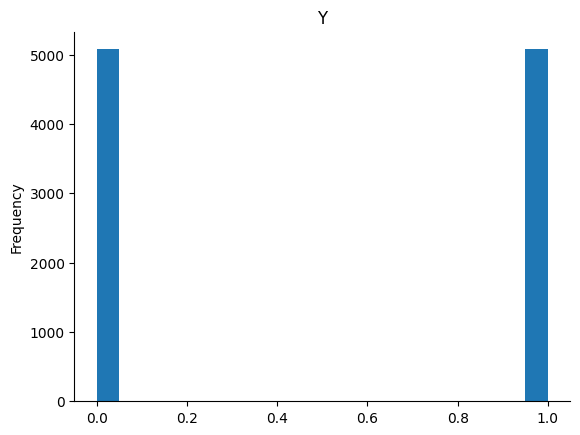

In [ ]:
from matplotlib import pyplot as plt
train_rdkit_morgan['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_rdkit_morgan.to_csv("/content/drive/MyDrive/ADMET/train_rdkit_morgan_smote.csv", index = False)
test_rdkit_morgan.to_csv("/content/drive/MyDrive/ADMET/test_rdkit_morgan.csv", index = False)

In [ ]:
train_rdkit=train_rdkit_morgan.loc[:,"Y": "fr_urea"]
test_rdkit=test_rdkit_morgan.loc[:,"property": "fr_urea"]
train_morgan=pd.concat([train_rdkit_morgan.loc[:,"Y": "property"], train_rdkit_morgan.loc[:,"Bit_0": "Bit_1023"]], axis=1)
test_morgan=pd.concat([test_rdkit_morgan['property'], test_rdkit_morgan.loc[:,"Bit_0": "Bit_1023"]], axis=1)

In [ ]:
train_morgan.to_csv("/content/drive/MyDrive/ADMET/train_morgan_smote.csv", index = False)
test_morgan.to_csv("/content/drive/MyDrive/ADMET/test_morgan.csv", index = False)
train_rdkit.to_csv("/content/drive/MyDrive/ADMET/train_rdkit_smote.csv", index = False)
test_rdkit.to_csv("/content/drive/MyDrive/ADMET/test_rdkit.csv", index = False)